In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
data = pd.read_csv("DummyVariables.csv", encoding="utf-8")

In [3]:
data.head()

,gender_female,gender_male,region_busan,region_incheon,region_kyungki,region_seoul,region_ulsan,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [4]:
X = data.loc[:, "gender_female" : "score_intention"]
y = data[['vote']]

In [5]:
from sklearn.model_selection import *
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 410)

### GridSearch

In [6]:
# Grid Search 
# 분석하는 사람이 하이퍼 파라미터의 특정값을 지정하고 각각 모델에 적용하여 모델적합도를 비교하는 방법
param_grid = {"C" : [0.001, 0.01, 0.1, 1, 10, 100]}

In [9]:
import sklearn
from sklearn.linear_model import *

In [11]:
help(sklearn.model_selection.GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [12]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = 5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [13]:
print("best_param : {}".format(grid_search.best_params_))
print("best_crossValidiry_score : {}".format(grid_search.best_score_))

best_param : {'C': 0.001}
best_crossValidiry_score : 0.7088709677419356


In [15]:
print("test_set_score : {:.3f} ".format(grid_search.score(X_test, y_test)))

test_set_score : 0.717 


In [16]:
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001953,0.000528,0.000572,0.000160,0.001,{'C': 0.001},0.71875,0.71875,0.68750,0.709677,...,0.708871,0.011430,1,0.706349,0.706349,0.714286,0.708661,0.708661,0.708861,0.002903
1,0.001752,0.000210,0.000423,0.000028,0.01,{'C': 0.01},0.71875,0.71875,0.68750,0.709677,...,0.708871,0.011430,1,0.706349,0.706349,0.714286,0.708661,0.708661,0.708861,0.002903
2,0.002295,0.000168,0.000435,0.000064,0.1,{'C': 0.1},0.68750,0.71875,0.71875,0.677419,...,0.702419,0.016933,3,0.706349,0.706349,0.706349,0.700787,0.708661,0.705699,0.002614
3,0.003625,0.000397,0.000485,0.000013,1,{'C': 1},0.65625,0.68750,0.68750,0.709677,...,0.677218,0.023377,4,0.722222,0.722222,0.722222,0.724409,0.732283,0.724672,0.003899
4,0.004760,0.000606,0.000604,0.000052,10,{'C': 10},0.65625,0.65625,0.68750,0.741935,...,0.670968,0.042695,5,0.722222,0.738095,0.738095,0.708661,0.740157,0.729446,0.012235
5,0.004833,0.000533,0.000608,0.000051,100,{'C': 100},0.65625,0.65625,0.68750,0.741935,...,0.670968,0.042695,5,0.722222,0.738095,0.738095,0.708661,0.740157,0.729446,0.012235


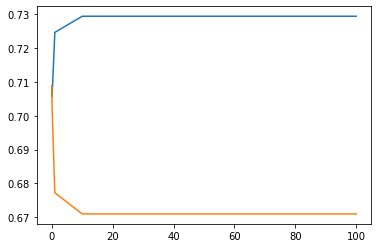

In [19]:
import matplotlib.pyplot as plt 
plt.plot(result_grid['param_C'], result_grid['mean_train_score'])
plt.plot(result_grid['param_C'], result_grid['mean_test_score'])

### Random Search

In [20]:
from scipy.stats import randint

In [21]:
# randomSearch는 범위를 정하고 그 안에서 무작위로 C값을 찾는 것
param_distribs = {"C" : randint(low = 0.0001, high = 100)}

In [22]:
random_search = RandomizedSearchCV(LogisticRegression(),
param_distributions=param_distribs, cv = 5, return_train_score= True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12869a820>},
                   return_train_score=True)

In [23]:
print("best_param : {}".format(random_search.best_params_))
print("best_crossValidiry_score : {}".format(random_search.best_score_))

best_param : {'C': 56}
best_crossValidiry_score : 0.6709677419354839


In [24]:
print("test_set_score : {:.3f} ".format(random_search.score(X_test, y_test)))

test_set_score : 0.698 


In [26]:
result_random =  random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004975,0.000590,0.000587,0.000103,56,{'C': 56},0.65625,0.65625,0.6875,0.741935,...,0.670968,0.042695,1,0.722222,0.738095,0.738095,0.708661,0.740157,0.729446,0.012235
1,0.004354,0.000557,0.000463,0.000030,29,{'C': 29},0.65625,0.65625,0.6875,0.741935,...,0.670968,0.042695,1,0.722222,0.738095,0.738095,0.708661,0.740157,0.729446,0.012235
2,0.004514,0.000399,0.000498,0.000046,43,{'C': 43},0.65625,0.65625,0.6875,0.741935,...,0.670968,0.042695,1,0.722222,0.738095,0.738095,0.708661,0.740157,0.729446,0.012235
3,0.004463,0.000397,0.000408,0.000021,46,{'C': 46},0.65625,0.65625,0.6875,0.741935,...,0.670968,0.042695,1,0.722222,0.738095,0.738095,0.708661,0.740157,0.729446,0.012235
4,0.004311,0.000448,0.000423,0.000038,37,{'C': 37},0.65625,0.65625,0.6875,0.741935,...,0.670968,0.042695,1,0.722222,0.738095,0.738095,0.708661,0.740157,0.729446,0.012235
5,0.003825,0.000402,0.000420,0.000026,7,{'C': 7},0.65625,0.65625,0.6875,0.741935,...,0.670968,0.042695,1,0.722222,0.738095,0.730159,0.708661,0.740157,0.727859,0.011503
6,0.004273,0.000410,0.000445,0.000042,38,{'C': 38},0.65625,0.65625,0.6875,0.741935,...,0.670968,0.042695,1,0.722222,0.738095,0.738095,0.708661,0.740157,0.729446,0.012235
7,0.004451,0.000219,0.000456,0.000045,93,{'C': 93},0.65625,0.65625,0.6875,0.741935,...,0.670968,0.042695,1,0.722222,0.738095,0.738095,0.708661,0.740157,0.729446,0.012235
8,0.004427,0.000525,0.000472,0.000018,12,{'C': 12},0.65625,0.65625,0.6875,0.741935,...,0.670968,0.042695,1,0.722222,0.738095,0.738095,0.708661,0.740157,0.729446,0.012235
9,0.004813,0.000336,0.000484,0.000005,44,{'C': 44},0.65625,0.65625,0.6875,0.741935,...,0.670968,0.042695,1,0.722222,0.738095,0.738095,0.708661,0.740157,0.729446,0.012235


In [28]:
Final_model = LogisticRegression(C = 10);
Final_model.fit(X_train, y_train)

LogisticRegression(C=10)

In [29]:
pred_train = Final_model.predict(X_train)
Final_model.score(X_train, y_train)

0.7341772151898734

In [30]:
pred_test = Final_model.predict(X_test)
Final_model.score(X_test, y_test)

0.6981132075471698

In [32]:
from sklearn.metrics import * 
confusion_train = confusion_matrix(y_train, pred_train)
print(confusion_train)

[[ 10  36]
 [  6 106]]


In [35]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.62      0.22      0.32        46
           1       0.75      0.95      0.83       112

    accuracy                           0.73       158
   macro avg       0.69      0.58      0.58       158
weighted avg       0.71      0.73      0.69       158



In [33]:
confusion_test = confusion_matrix(y_test, pred_test)
print(confusion_test)

[[ 4 11]
 [ 5 33]]


In [36]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.44      0.27      0.33        15
           1       0.75      0.87      0.80        38

    accuracy                           0.70        53
   macro avg       0.60      0.57      0.57        53
weighted avg       0.66      0.70      0.67        53

